In [ ]:
# TODO: Standardize variable names. Example: x_return vs. y_returns. No reason to be both. They are all plural.
# TODO: Remove completely useless calculations that are done in steps before completing the actual strategy coding.
#    Example: Calculating the returns before you have extended the position and then doing it again after.
#    Just get the data correct and then start calculating returns and visualizing.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
np.random.seed(2) # Case 1: Under- then over-performs
# np.random.seed(16) # Case 2: Over-performs even when stocks perform poorly
# np.random.seed(44) # Case 3: Buy and hold wins

In [3]:
# Generate random data, "auto regressive model of order 1" (ARIMA)
x0 = 1 / (1 - 0.9)
sigma = 1 # Standard deviation
data = [x0]
for t in range(300):
    if t == 0:
        x = 1 + 0.9 * x0 + np.random.randn() * sigma
    else:
        x = 1 + 0.9 * x + np.random.randn() * sigma
    data.append(x)

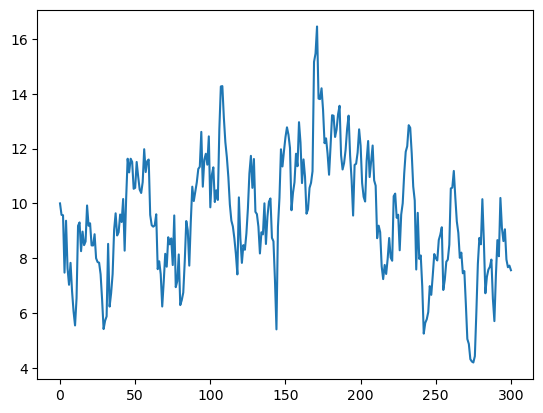

In [4]:
plt.plot(data)

In [10]:
p0 = 100
asset1 = [p0]
for t in range(300):
    if t == 0:
        p = p0 + np.random.randn() * sigma
    else:
        p = p + np.random.randn() * sigma
    asset1.append(p)

In [11]:
asset2 = np.array(asset1) + np.array(data)

In [12]:
asset1 = pd.Series(asset1)
asset2 = pd.Series(asset2)

<Axes: >

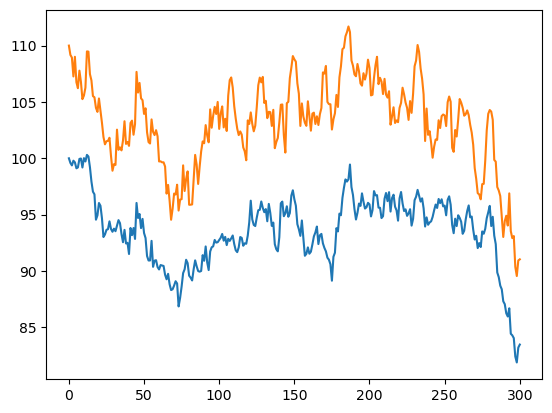

In [13]:
asset1.plot()
asset2.plot()

<Axes: >

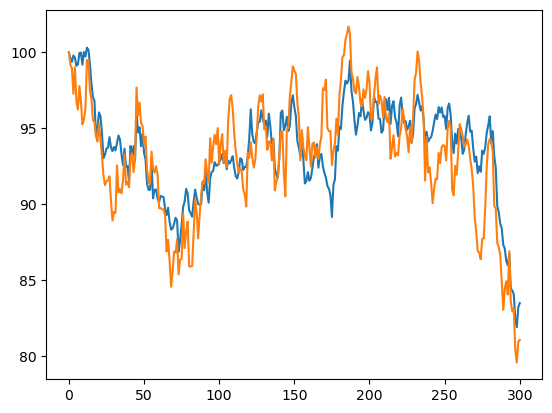

In [14]:
asset1.plot()
(asset2 - x0).plot()

In [15]:
asset1_mean = asset1.rolling(window=30).mean()
asset1_std = asset1.rolling(window=30).std()
asset2_mean = asset2.rolling(window=30).mean()
asset2_std = asset2.rolling(window=30).std()
z1 = (asset1 - asset1_mean) / asset1_std
z2 = (asset2 - asset2_mean) / asset2_std

<Axes: >

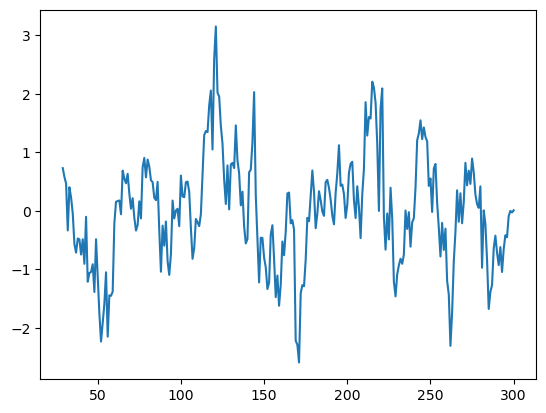

In [16]:
spread = z1 - z2
spread.plot()

In [17]:
spread_mean = spread.rolling(window=30).mean()
spread_std = spread.rolling(window=30).std()

In [18]:
upper_bound = spread_mean + 2 * spread_std
lower_bound = spread_mean - 2 * spread_std

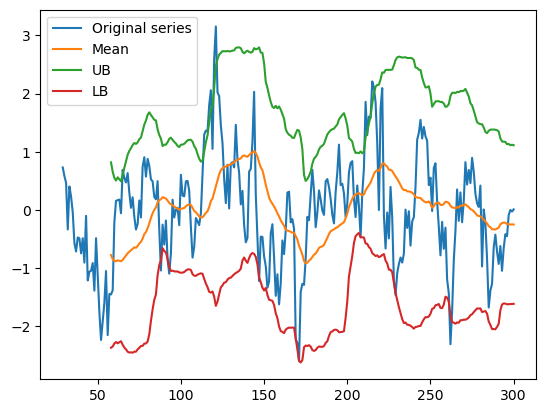

In [20]:
plt.plot(spread, label="Original series")
plt.plot(spread_mean, label="Mean")
plt.plot(upper_bound, label="UB")
plt.plot(lower_bound, label="LB")
plt.legend()

In [21]:
long_signal = (spread < lower_bound).astype(int)
short_signal = (spread > upper_bound).astype(int)

In [22]:
# Compute the positions for each asset
asset1_position = long_signal - short_signal
asset2_position = short_signal - long_signal

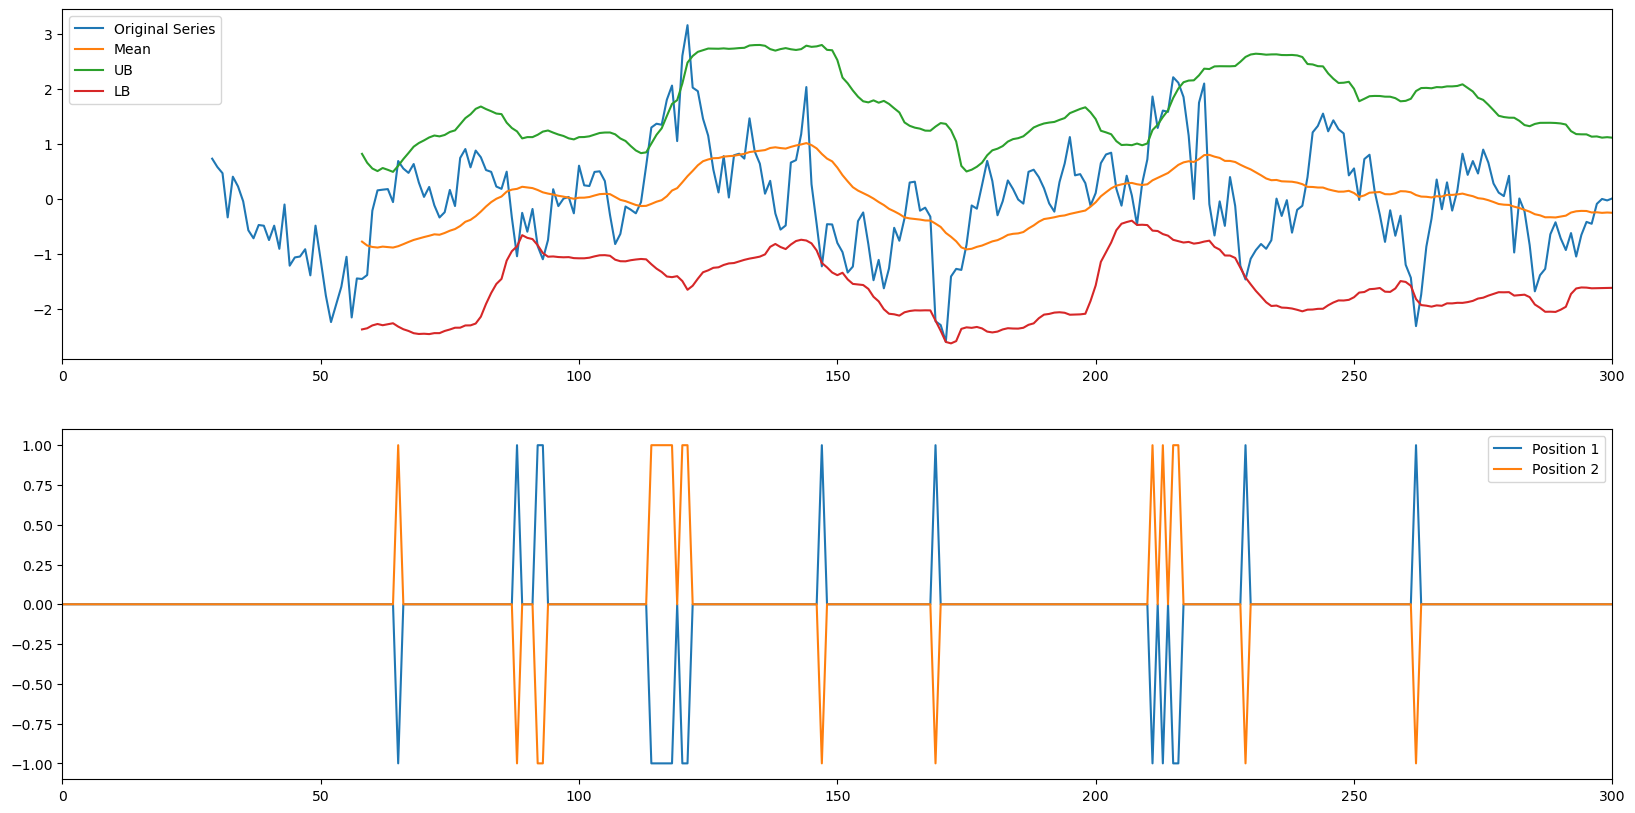

In [25]:
plt.figure(figsize=(20, 10))
plt.subplot(211)
plt.plot(spread, label="Original Series")
plt.plot(spread_mean, label="Mean")
plt.plot(upper_bound, label="UB")
plt.plot(lower_bound, label="LB")
plt.xlim([0, 300])
plt.legend()
plt.subplot(212)
plt.plot(asset1_position, label="Position 1")
plt.plot(asset2_position, label="Position 2")
plt.xlim([0, 300])
plt.legend()

<Axes: >

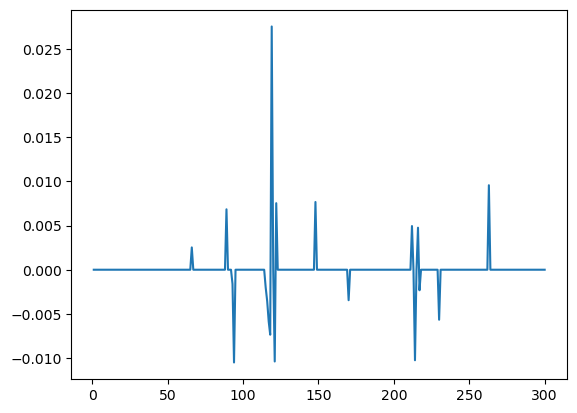

In [26]:
# Compute the cumulative returns
asset1_returns = asset1.pct_change()
asset2_returns = asset2.pct_change()
daily_return = asset1_position.shift(1) * asset1_returns + asset2_position.shift(1) * asset2_returns
daily_return.plot()

<Axes: >

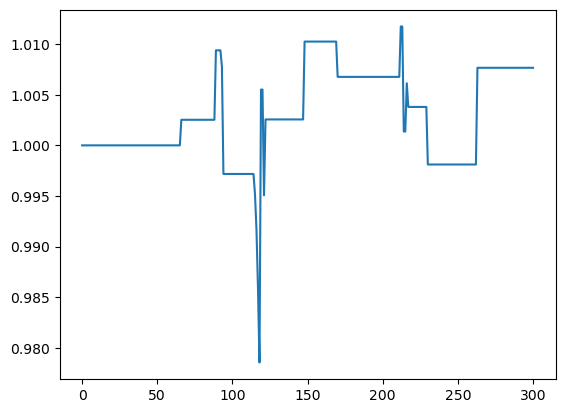

In [27]:
cumulative_return = (daily_return.fillna(value=0) + 1).cumprod()
cumulative_return.plot()

<Axes: >

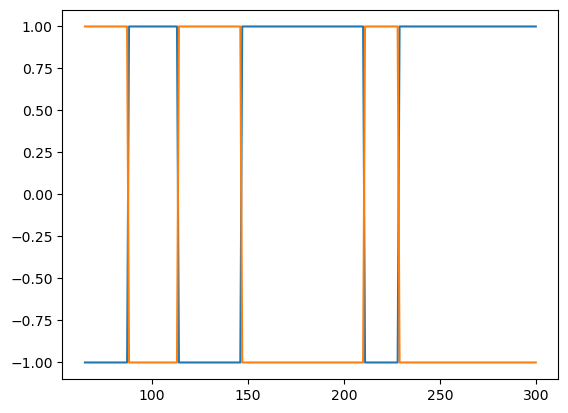

In [28]:
# Extend the positions
position1_filled = asset1_position.copy()
position1_filled[asset1_position == 0] = np.nan
position1_filled = position1_filled.ffill()

position2_filled = asset2_position.copy()
position2_filled[asset2_position == 0] = np.nan
position2_filled = position2_filled.ffill()

position1_filled.plot()
position2_filled.plot()

<Axes: >

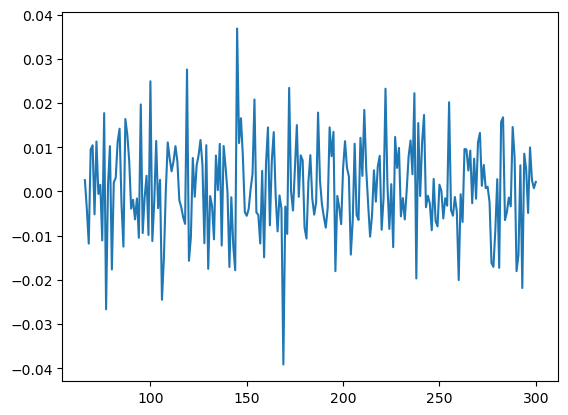

In [31]:
# Compute the portfolio returns
asset1_returns = asset1.pct_change()
asset2_returns = asset2.pct_change()
daily_return2 = position1_filled.shift(1) * asset1_returns + position2_filled.shift(1) * asset2_returns
daily_return2.plot()

<Axes: >

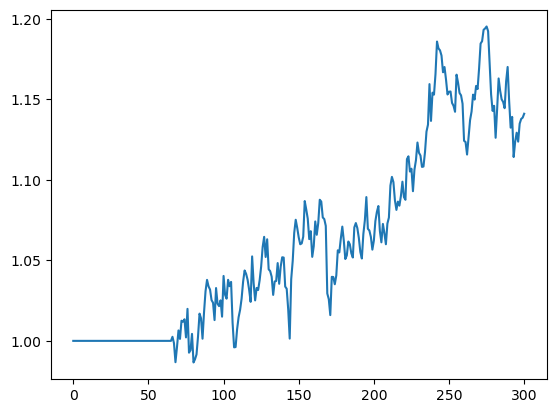

In [32]:
cumulative_return2 = (daily_return2.fillna(value=0) + 1).cumprod()
cumulative_return2.plot()

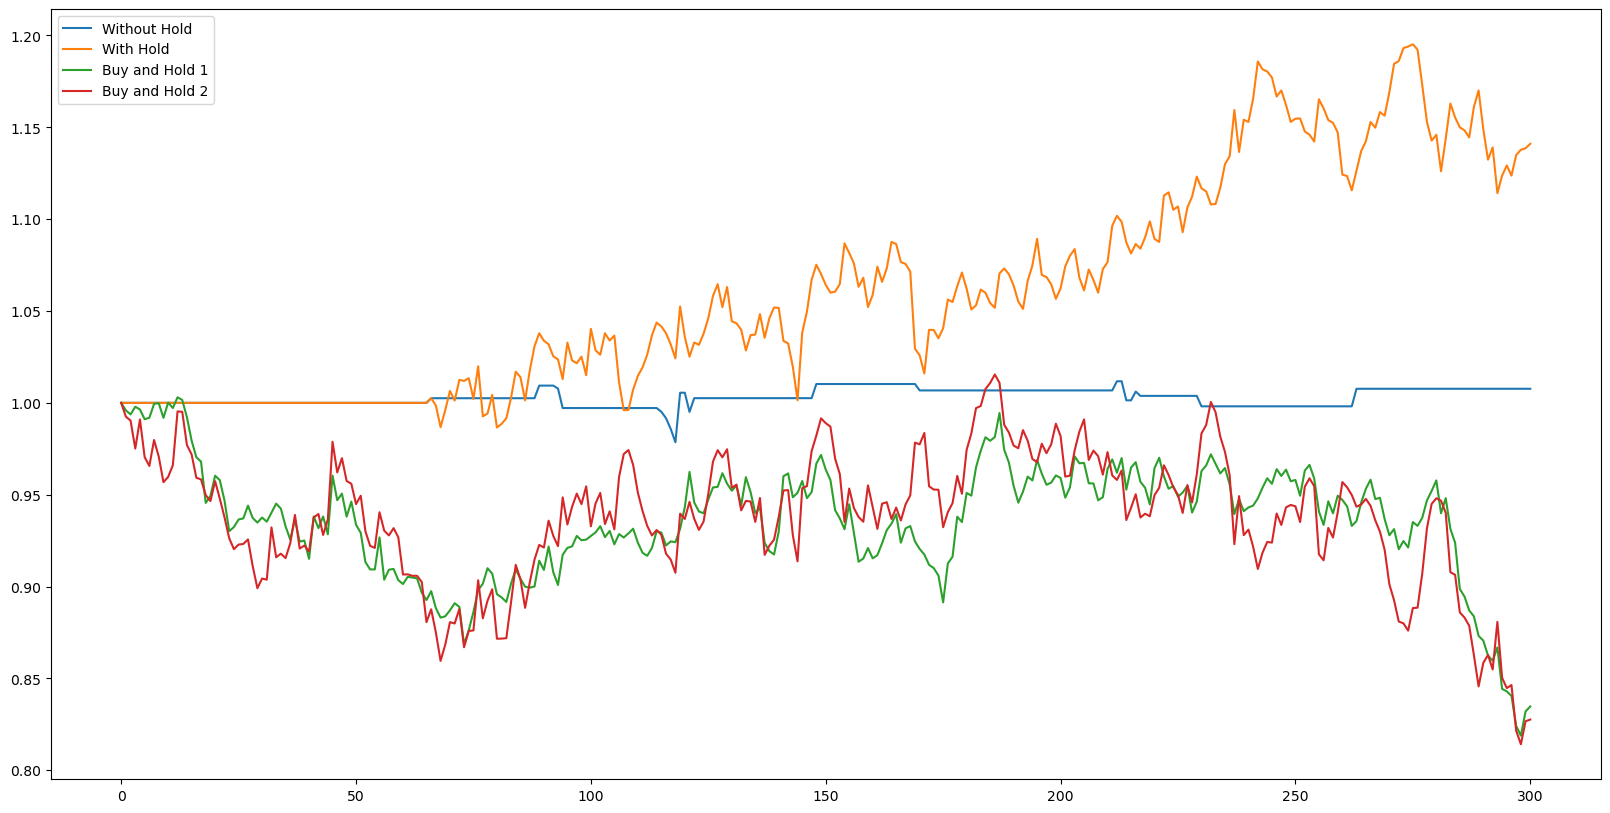

In [33]:
plt.figure(figsize=(20, 10))
plt.plot(cumulative_return, label="Without Hold")
plt.plot(cumulative_return2, label="With Hold")
plt.plot(asset1 / asset1.iloc[0], label="Buy and Hold 1")
plt.plot(asset2 / asset2.iloc[0], label="Buy and Hold 2")
plt.legend()